# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import svm
import numpy as np
import cv2 # нужно поставить себе cv2 через conda install opencv
import warnings

warnings.filterwarnings("ignore")
def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

In [ ]:
# https://www.pixel-creation.com/wp-content/uploads/team-fortress-2-engineer-wallpapers-wallpaper-cave.jpg - Картинка для проверки алгоритмов

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

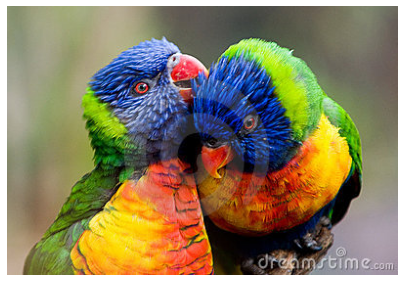

In [ ]:
img = cv2.imread('two-lorikeet-birds-2293918.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

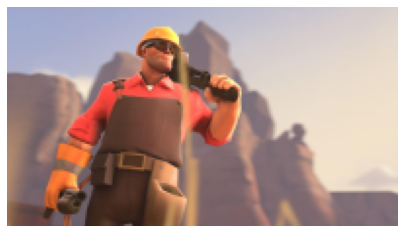

In [ ]:
img2 = cv2.imread('team-fortress-2-engineer-wallpapers-wallpaper-cave.jpg') # считать картинку
final_wide = 200
r = float(final_wide) / img2.shape[1]
dim = (final_wide, int(img2.shape[0] * r))
resized = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)

draw_picture(resized)

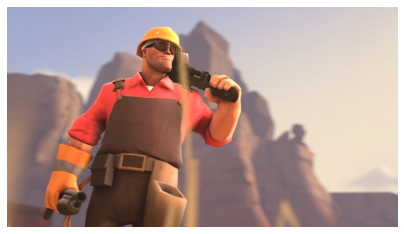

In [ ]:
draw_picture(img2)

In [ ]:
print(img2.shape)

(1080, 1920, 3)


In [ ]:
print(resized.shape)

(112, 200, 3)


In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(275, 400, 3)


In [ ]:
# reshape двухмерного массива в одномерный

img_array = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    img_array.append(img[i, j])

img_array[:10]

[array([116, 150, 140], dtype=uint8),
 array([115, 149, 139], dtype=uint8),
 array([113, 147, 137], dtype=uint8),
 array([111, 145, 135], dtype=uint8),
 array([109, 143, 133], dtype=uint8),
 array([107, 141, 131], dtype=uint8),
 array([106, 140, 130], dtype=uint8),
 array([105, 139, 129], dtype=uint8),
 array([107, 142, 132], dtype=uint8),
 array([107, 142, 132], dtype=uint8)]

In [ ]:
img2_array = []
for i in range(img2.shape[0]):
  for j in range(img2.shape[1]):
    img2_array.append(img2[i, j])

img2_array[:10]

[array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8)]

In [ ]:
resized_array = []
for i in range(resized.shape[0]):
  for j in range(resized.shape[1]):
    resized_array.append(resized[i, j])

resized_array[:10]

[array([205, 169, 159], dtype=uint8),
 array([205, 169, 159], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8),
 array([205, 168, 160], dtype=uint8)]

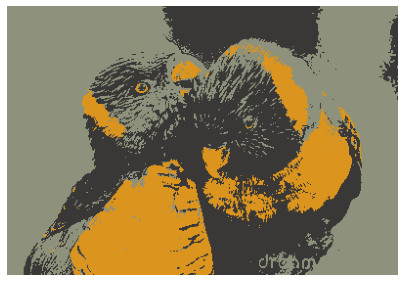

In [ ]:
clusters = 3

img_array_3 = img_array.copy()
model_3 = KMeans(n_clusters=clusters, random_state=42)
color_pred_3 = model_3.fit_predict(img_array_3)
centroids_3 = model_3.fit(img_array_3).cluster_centers_
centroids_3 = centroids_3.astype(int)

for i in range(len(img_array_3)):
  for cluster in range(clusters):
    if color_pred_3[i] == cluster:
      img_array_3[i] = centroids_3[cluster]

img_new_3 = np.reshape(img_array_3, (275, 400, 3))
new_image_3 = draw_picture(img_new_3)

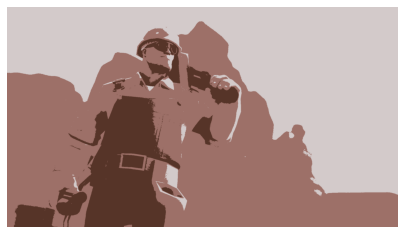

In [ ]:
clusters = 3

img2_array_my = img2_array.copy()
myModel = KMeans(n_clusters=clusters, random_state=42)
color_pred_my = myModel.fit_predict(img2_array_my)
centroids_my = myModel.fit(img2_array_my).cluster_centers_
centroids_my = centroids_my.astype(int)

for i in range(len(img2_array_my)):
  for cluster in range(clusters):
    if color_pred_my[i] == cluster:
      img2_array_my[i] = centroids_my[cluster]

img2_new = np.reshape(img2_array_my, (1080, 1920, 3))
new_image_ENGINEER = draw_picture(img2_new)

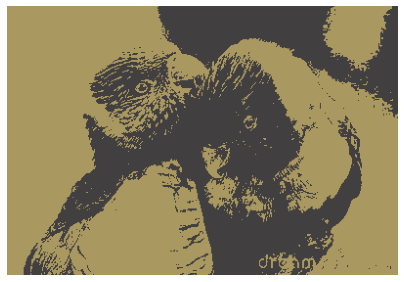

In [ ]:
clusters = 2

img_array_2 = img_array.copy()
model_2 = KMeans(n_clusters=clusters, random_state=42)
color_pred_2 = model_2.fit_predict(img_array_2)
centroids_2 = model_2.fit(img_array_2).cluster_centers_
centroids_2 = centroids_2.astype(int)

for i in range(len(img_array_2)):
  for cluster in range(clusters):
    if color_pred_2[i] == cluster:
      img_array_2[i] = centroids_2[cluster]

img_new_2 = np.reshape(img_array_2, (275, 400, 3))
new_image_2 = draw_picture(img_new_2)

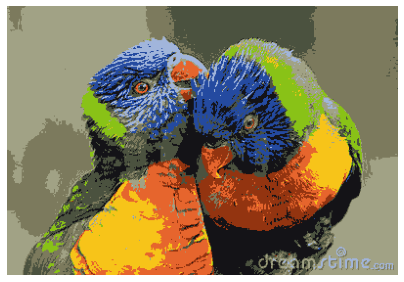

In [ ]:
clusters = 10

img_array_10 = img_array.copy()
model_10 = KMeans(n_clusters=clusters, random_state=42)
color_pred_10 = model_10.fit_predict(img_array_10)
centroids_10 = model_10.fit(img_array_10).cluster_centers_
centroids_10 = centroids_10.astype(int)

for i in range(len(img_array_10)):
  for cluster in range(clusters):
    if color_pred_10[i] == cluster:
      img_array_10[i] = centroids_10[cluster]

img_new_10 = np.reshape(img_array_10, (275, 400, 3))
new_image_10 = draw_picture(img_new_10)

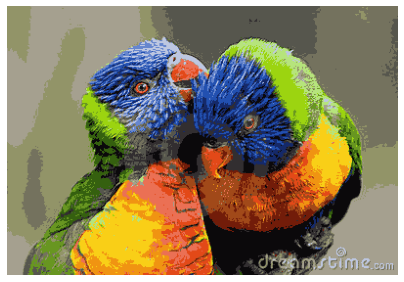

In [ ]:
clusters = 20

img_array_20 = img_array.copy()
model_20 = KMeans(n_clusters=clusters, random_state=42)
color_pred_20 = model_20.fit_predict(img_array_20)
centroids_20 = model_20.fit(img_array_20).cluster_centers_
centroids_20 = centroids_20.astype(int)

for i in range(len(img_array_20)):
  for cluster in range(clusters):
    if color_pred_20[i] == cluster:
      img_array_20[i] = centroids_20[cluster]

img_new_20 = np.reshape(img_array_20, (275, 400, 3))
new_image_20 = draw_picture(img_new_20)

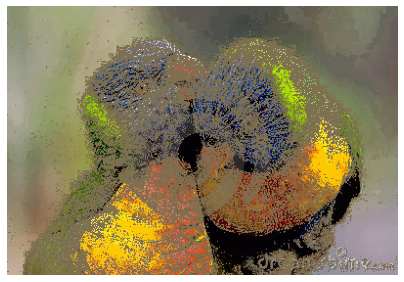

In [ ]:
img_array_dbscan = img_array.copy() ################################################## DBSCAN ###########################################################
# перебрал eps от 0.5 до 20 и min_samples от 2 до 200. 
# При увеличении обоих параметров яркие цвета идентифицируются как выбросы, и замазываются болотно-серым, превращая попугаев в болотно-зеленый квадрат
model = DBSCAN(eps=1.5, min_samples=2)
y_pred = model.fit_predict(img_array_dbscan)
b = np.column_stack((y_pred, img_array_dbscan))
for i in np.unique(y_pred):
  mask = (b[:,0] == i)
  extract_from_b = b[mask] 
  color_r = extract_from_b[:, 1].mean() #111
  color_g = extract_from_b[:, 2].mean() #133
  color_b = extract_from_b[:, 3].mean() #135
  b[b[:,0] == i] = [i, color_r, color_g, color_b]

img_array_dbscan_2 = np.delete(b, 0, axis=1)
img_new_dbscan_2 = np.reshape(img_array_dbscan_2, (275, 400, 3))
new_image_dbscan = draw_picture(img_new_dbscan_2)

# img_array_dbscan[:][0].max() #- 150
# img_array_dbscan[:][1].max() #- 149
# img_array_dbscan[:][2].max() #- 147

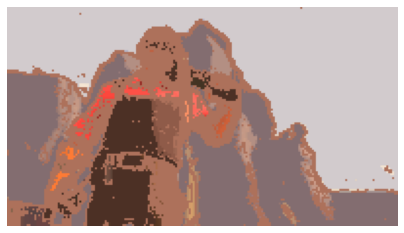

In [ ]:
# Инженер через DBSCAN

img_array_dbscan_my = resized_array.copy()
MyModel = DBSCAN(eps=1.5, min_samples=5)
y_pred_2 = MyModel.fit_predict(img_array_dbscan_my)
b_2 = np.column_stack((y_pred_2, img_array_dbscan_my))
for i in np.unique(y_pred_2):
  mask = (b_2[:,0] == i)
  extract_from_b_2 = b_2[mask] 
  color_r = extract_from_b_2[:, 1].mean() #111
  color_g = extract_from_b_2[:, 2].mean() #133
  color_b = extract_from_b_2[:, 3].mean() #135
  b_2[b_2[:,0] == i] = [i, color_r, color_g, color_b]

img_array_dbscan_2my = np.delete(b_2, 0, axis=1)
img_new_dbscan_2my = np.reshape(img_array_dbscan_2my, (112, 200, 3))
new_image_dbscan_ENGINEER = draw_picture(img_new_dbscan_2my)

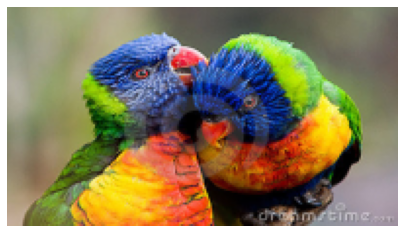

In [ ]:
resized_bird = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
draw_picture(resized_bird)

In [ ]:
resized_bird.shape

(112, 200, 3)

In [ ]:
AC_bird_array = []
for i in range(resized_bird.shape[0]):
  for j in range(resized_bird.shape[1]):
    AC_bird_array.append(resized_bird[i, j])

AC_bird_array[:5]

[array([114, 148, 138], dtype=uint8),
 array([112, 146, 136], dtype=uint8),
 array([110, 144, 134], dtype=uint8),
 array([109, 143, 133], dtype=uint8),
 array([107, 142, 132], dtype=uint8)]

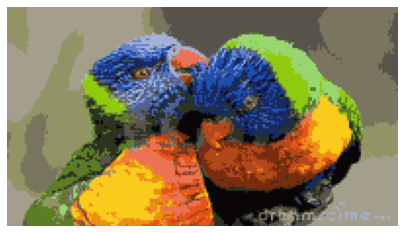

In [ ]:
clusters = 20 # <- Для отрисовки разного количества цветов изменять параметр здесь
################################################# Agglomerative Clustering #################################################################
AC_array = AC_bird_array.copy()
model_AC = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
y_pred_AC = model_AC.fit_predict(AC_array)
cluster_labels = model_AC.labels_

clf = NearestCentroid()
clf.fit(AC_array, y_pred_AC)
centroids_AC = clf.centroids_
centroids_AC = centroids_AC.astype(int)
# np.unique(cluster_labels)
# centroids_AC

for i in range(len(AC_array)):
  for cluster in range(clusters):
    if y_pred_AC[i] == cluster:
      AC_array[i] = centroids_AC[cluster]

# AC_array = np.array(AC_array, dtype=int)
img_new_AC = np.reshape(AC_array, (112, 200, 3))
new_image_AC = draw_picture(img_new_AC)

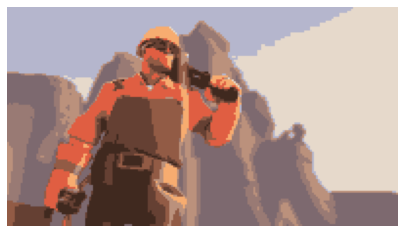

In [ ]:
clusters = 10 # <- Для отрисовки разного количества цветов изменять параметр здесь

ENGI_AC_array = resized_array.copy()
model_ENGI = AgglomerativeClustering(n_clusters=clusters, linkage='ward')
y_pred_AC_ENGI = model_ENGI.fit_predict(ENGI_AC_array)
# cluster_labels_ENGI = model_ENGI.labels_

clf_engi = NearestCentroid()
clf_engi.fit(ENGI_AC_array, y_pred_AC_ENGI)
centroids_AC_ENGI = clf_engi.centroids_
centroids_AC_ENGI = centroids_AC_ENGI.astype(int)
# np.unique(cluster_labels)
# centroids_AC

for i in range(len(ENGI_AC_array)):
  for cluster in range(clusters):
    if y_pred_AC_ENGI[i] == cluster:
      ENGI_AC_array[i] = centroids_AC_ENGI[cluster]

img_new_AC_ENGI = np.reshape(ENGI_AC_array, (112, 200, 3))
new_image_AC_ENGI = draw_picture(img_new_AC_ENGI)

In [ ]:
from skimage.metrics import structural_similarity as ssim
import warnings
warnings.filterwarnings('ignore')

print('Совпадение для KMeans изначальной картинки и 20-кластерной = ', ssim(img, img_new_20, multichannel=True))
print('Совпадение для DBSCAN изначальной картинки и получившейся = ', ssim(img, img_new_dbscan_2, multichannel=True))
print('Совпадение для АС изначальной картинки и 20-кластерной (Сжатой) = ', ssim(resized_bird, img_new_AC, multichannel=True))

Совпадение для KMeans изначальной картинки и 20-кластерной =  0.7590932759492461
Совпадение для DBSCAN изначальной картинки и получившейся =  0.5141906066561254
Совпадение для АС изначальной картинки и 20-кластерной (Сжатой) =  0.7466251403612888
